In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_path = os.path.join('data','zippedData')
data_files = os.listdir(data_path)
#data_files.pop(data_files.index('.ipynb_checkpoints'))
data_files.pop(data_files.index('Untitled.ipynb'))
data_files = [os.path.join(data_path,file) for file in data_files]
data_files

['data/zippedData/imdb.title.crew.csv.gz',
 'data/zippedData/tmdb.movies.csv.gz',
 'data/zippedData/imdb.title.akas.csv.gz',
 'data/zippedData/imdb.title.ratings.csv.gz',
 'data/zippedData/imdb.name.basics.csv.gz',
 'data/zippedData/rt.reviews.tsv.gz',
 'data/zippedData/imdb.title.basics.csv.gz',
 'data/zippedData/rt.movie_info.tsv.gz',
 'data/zippedData/tn.movie_budgets.csv.gz',
 'data/zippedData/bom.movie_gross.csv.gz',
 'data/zippedData/imdb.title.principals.csv.gz']

In [3]:
data = {}
name_dict={'imdb.title.crew.csv.gz':"crew",
           'tmdb.movies.csv.gz':"movies",
           'imdb.title.akas.csv.gz':"akas",
           'imdb.title.ratings.csv.gz':"ratings",
           'imdb.name.basics.csv.gz':"name_basics",
           'rt.reviews.tsv.gz':"reviews",
           'imdb.title.basics.csv.gz':"title_basics",
           'rt.movie_info.tsv.gz':"movie_info",
           'tn.movie_budgets.csv.gz':"movie_budgets",
           'bom.movie_gross.csv.gz':"movie_gross",
           'imdb.title.principals.csv.gz':"principals"
          }
for file in data_files:
    try:
        df = pd.read_csv(file)
    except:
        print(file)
        continue
    file_name = file.split('/')[-1]
    data[name_dict[file_name]] = df
    
data["movie_info"]=pd.read_csv('data/zippedData/rt.movie_info.tsv.gz', sep="\t")
data["reviews"]=pd.read_csv('data/zippedData/rt.reviews.tsv.gz', sep="\t", encoding="latin1")

data/zippedData/rt.reviews.tsv.gz
data/zippedData/rt.movie_info.tsv.gz


In [5]:
data.keys()

dict_keys(['crew', 'movies', 'akas', 'ratings', 'name_basics', 'title_basics', 'movie_budgets', 'movie_gross', 'principals', 'movie_info', 'reviews'])

In [13]:
#title basics, title ratings, movie gross
#crew, movies, akas, ratings, name_basics, reviews, title_basics, movie_info, movie_budgets, movie_gross, principals
data_columns=list(map(lambda x: (x, list(data[x].columns), list(data[x][data[x].columns].count())), data.keys()))

data["crew"]

# Two main starting goals for microsoft: 1. Exposure/popularity 2. Profit
    # 1. Gauge can be number of views. Don't know if this data exists in our sets
        #a. populatiry in 'movies'
        #b. ratings
    # 2. Gauge needs to take into account gross vs budget. and also weight gross or budget in their own right

# Can correlate high success indicators with:
    #1. Genre
    #2. Budget
    #3. Runtime
    #4. Date (released, etc.)
    #5. Studio
    #6. Director
    #7. Writer
    #8. Top Actors
    #9. Rating (PG, R, etc.)
    
# Consider only using past 10 years of data for time relevance (key into recent movie industry trends)
# Monitor dependencies of traits with same movie entries
# Correct for inflation?

data_columns
#data["movies"].sort_values(by="popularity", ascending=False).head(50)
#data["movies"]["genre_ids"].count()
#data["movie_info"]



# domestic gross, worldwide gross, worldwide gross/prod budget, popularity, vote_average

[('crew', ['tconst', 'directors', 'writers'], [146144, 140417, 110261]),
 ('movies',
  ['Unnamed: 0',
   'genre_ids',
   'id',
   'original_language',
   'original_title',
   'popularity',
   'release_date',
   'title',
   'vote_average',
   'vote_count'],
  [26517, 26517, 26517, 26517, 26517, 26517, 26517, 26517, 26517, 26517]),
 ('akas',
  ['title_id',
   'ordering',
   'title',
   'region',
   'language',
   'types',
   'attributes',
   'is_original_title'],
  [331703, 331703, 331703, 278410, 41715, 168447, 14925, 331678]),
 ('ratings', ['tconst', 'averagerating', 'numvotes'], [73856, 73856, 73856]),
 ('name_basics',
  ['nconst',
   'primary_name',
   'birth_year',
   'death_year',
   'primary_profession',
   'known_for_titles'],
  [606648, 606648, 82736, 6783, 555308, 576444]),
 ('title_basics',
  ['tconst',
   'primary_title',
   'original_title',
   'start_year',
   'runtime_minutes',
   'genres'],
  [146144, 146144, 146123, 146144, 114405, 140736]),
 ('movie_budgets',
  ['id',
 

In [100]:
df_budgets=data["movie_budgets"].set_index("movie")
df_title_basics=data["title_basics"].set_index("primary_title")

df_joined=df_budgets.join(df_title_basics, how="left")
df_joined.reset_index(inplace=True)
#df_joined.isna()["original_title"].sum()
#df_joined.sort_values(by="original_title", ascending=False)
df2=df_joined
df2.dropna(subset=["tconst"], inplace=True)
df2.reset_index(inplace=True)
df2.set_index("tconst", inplace=True)
df2.columns=['level_0', 'title', 'id', 'release_date', 'production_budget',
       'domestic_gross', 'worldwide_gross', 'original_title', 'start_year',
       'runtime_minutes', 'genres']
#df_joined_2[df_joined_2["original_title"]="0"]
#df2[df2["original_title"]=="0"]
#data["title_basics"]
#itmb=pd.merge(movie_budgets, title_basics, on=primary_title)
#df2["production_budget"].astype("float")#replace(",", "")
#df2.sort_values(by=["worldwide_gross"], ascending=True)
#df2.replace(to_replace="$", value="")

df2_df_joined=df_budgets.join(df_title_basics, how="left")

,level_0,title,id,release_date,production_budget,domestic_gross,worldwide_gross,original_title,start_year,runtime_minutes,genres
tconst,,,,,,,,,,,
tt3526286,0,#Horror,16,"Nov 20, 2015","$1,500,000",$0,$0,#Horror,2015.0,101.0,"Crime,Drama,Horror"
tt1179933,2,10 Cloverfield Lane,54,"Mar 11, 2016","$5,000,000","$72,082,999","$108,286,422",10 Cloverfield Lane,2016.0,103.0,"Drama,Horror,Mystery"
tt3453052,3,10 Days in a Madhouse,48,"Nov 11, 2015","$12,000,000","$14,616","$14,616",10 Days in a Madhouse,2015.0,111.0,Drama
tt3517850,11,12 Rounds,37,"Mar 27, 2009","$20,000,000","$12,234,694","$17,306,648",12 Rounds,2017.0,NaN,"Action,Drama,Romance"
tt1413492,12,12 Strong,64,"Jan 19, 2018","$35,000,000","$45,819,713","$71,118,378",12 Strong,2018.0,130.0,"Action,Drama,History"
...,...,...,...,...,...,...,...,...,...,...,...
tt6117454,7207,Zoom,26,"Aug 11, 2006","$35,000,000","$11,989,328","$12,506,188",Zoom,2016.0,NaN,"Crime,Thriller"
tt6667868,7208,Zoom,26,"Aug 11, 2006","$35,000,000","$11,989,328","$12,506,188",Zoom,2016.0,NaN,Horror
tt2948356,7209,Zootopia,57,"Mar 4, 2016","$150,000,000","$341,268,248","$1,019,429,616",Zootopia,2016.0,108.0,"Adventure,Animation,Comedy"


In [79]:
df2.duplicated(subset="index")

0       False
2       False
3       False
11      False
12      False
        ...  
7207     True
7208     True
7209    False
7210    False
7218    False
Length: 3815, dtype: bool

In [4]:
data['title_basics'] = data['title_basics'].rename(columns={'primary_title':'title'})
data['movie_budgets'] = data['movie_budgets'].rename(columns={'movie':'title'})

data['movie_budgets']['worldwide_gross'] = data['movie_budgets']['worldwide_gross'].str.replace(',', '')
data['movie_budgets']['worldwide_gross'] = data['movie_budgets']['worldwide_gross'].str.replace('$', '')
data['movie_budgets']['worldwide_gross'] = data['movie_budgets']['worldwide_gross'].astype(int)
data['movie_budgets']['production_budget'] = data['movie_budgets']['production_budget'].str.replace(',', '')
data['movie_budgets']['production_budget'] = data['movie_budgets']['production_budget'].str.replace('$', '')
data['movie_budgets']['production_budget'] = data['movie_budgets']['production_budget'].astype(int)
data['movie_budgets']['domestic_gross'] = data['movie_budgets']['domestic_gross'].str.replace(',', '')
data['movie_budgets']['domestic_gross'] = data['movie_budgets']['domestic_gross'].str.replace('$', '')
data['movie_budgets']['domestic_gross'] = data['movie_budgets']['domestic_gross'].astype(int)

data['movie_budgets'] = data['movie_budgets'].drop(columns=['release_date','domestic_gross'])

data['ratings'] = data['ratings'][data['ratings'].numvotes >= 100]

data['ratings']['mean_diff'] = data['ratings'].averagerating - data['ratings'].averagerating.mean()

data['akas'].rename(columns={'title_id': 'tconst'}, inplace = True)

tconst_to_title = pd.merge(data['akas'],data['ratings'],on='tconst')

tconst_to_title = tconst_to_title.drop(columns=['ordering','region','language','types','attributes','is_original_title'])

master_table = pd.merge(tconst_to_title,data['movie_budgets'],on='title')

master_table['success_score'] = master_table.mean_diff * (master_table.worldwide_gross / master_table.production_budget)

master_table[master_table.tconst == 'tt0369610']

master_table.drop_duplicates(subset = ['tconst'],inplace=True)

master_table = pd.merge(data['title_basics'],master_table,on='tconst')

master_table

,tconst,title_x,original_title,start_year,runtime_minutes,genres,title_y,averagerating,numvotes,mean_diff,id,production_budget,worldwide_gross,success_score
0,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",Saving Grace,8.1,263,2.192985,95,4000000,27786849,15.234036
1,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",Foodfight!,1.9,8248,-4.007015,26,45000000,73706,-0.006563
2,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",On the Road,6.1,37886,0.192985,17,25000000,9313302,0.071893
3,tt0339736,The Evil Within,The Evil Within,2017,98.0,Horror,Whiplash,5.6,2420,-0.307015,43,3300000,38969037,-3.625478
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",The Secret Life of Walter Mitty,7.3,275300,1.392985,37,91000000,187861183,2.875690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,tt8941440,Virus,Virus,2019,152.0,"Drama,Thriller",Virus,8.6,372,2.692985,69,75000000,30626690,1.099696
2517,tt9024106,Unplanned,Unplanned,2019,106.0,"Biography,Drama",Unplanned,6.3,5945,0.392985,33,6000000,18107621,1.186004
2518,tt9174334,The Villagers,The Villagers,2018,99.0,"Action,Thriller",Ordinary People,5.7,101,-0.207015,18,6000000,52302978,-1.804583
2519,tt9225192,Unstoppable,Seongnan hwangso,2018,116.0,"Action,Crime",Unstoppable,6.5,576,0.592985,19,95000000,165720921,1.034421


In [5]:
gml=list(master_table["genres"].unique())
genre_list=[]
for genres in gml:
    genre_list.append(genres.split(","))
genre_list

genre_master=[]
for genre in genre_list:
    for subgenre in genre:
        genre_master.append(subgenre)

unique_genre_master=set(genre_master)
unique_genre_master

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [6]:
master_table.shape



vector=list(range(0,2521))
df_genres=[]
df_consts=[]

for genre in unique_genre_master:
    for number in vector:
        if genre in master_table.iloc[number, 5]:
            df_genres.append(genre)
            df_consts.append(master_table.iloc[number, 0])
    
genre_table=pd.DataFrame({'tconst':df_consts, 'genre':df_genres})
complete_genre_table=pd.merge(genre_table, master_table, how="left", on="tconst")
complete_genre_table

,tconst,genre,title_x,original_title,start_year,runtime_minutes,genres,title_y,averagerating,numvotes,mean_diff,id,production_budget,worldwide_gross,success_score
0,tt0383010,Family,The Three Stooges,The Three Stooges,2012,92.0,"Comedy,Family",The Three Stooges,5.1,28570,-0.807015,4,30000000,54052249,-1.454032
1,tt0433035,Family,Real Steel,Real Steel,2011,127.0,"Action,Drama,Family",Real Steel,7.1,283534,1.192985,31,110000000,263880341,2.861866
2,tt0492389,Family,Furry Vengeance,Furry Vengeance,2010,92.0,"Comedy,Family",Furry Vengeance,3.8,14700,-2.107015,17,35000000,39340177,-2.368295
3,tt0493949,Family,Ramona and Beezus,Ramona and Beezus,2010,103.0,"Adventure,Comedy,Family",Ramona and Beezus,6.6,16086,0.692985,60,15000000,27469621,1.269069
4,tt0808510,Family,Tooth Fairy,Tooth Fairy,2010,101.0,"Comedy,Family,Fantasy",Tooth Fairy,5.0,37939,-0.907015,23,48000000,112610386,-2.127902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6089,tt7476946,Crime,River's Edge,Ribâzu ejji,2018,118.0,Crime,River's Edge,6.3,409,0.392985,4,1900000,4600000,0.951438
6090,tt7690670,Crime,SuperFly,Superfly,2018,116.0,"Action,Crime,Thriller",Superfly,5.0,4753,-0.907015,49,16000000,20723581,-1.174787
6091,tt7959026,Crime,The Mule,The Mule,2018,116.0,"Crime,Drama,Thriller",The Mule,7.1,58955,1.192985,100,50000000,170857676,4.076613
6092,tt8043306,Crime,Teefa in Trouble,Teefa in Trouble,2018,155.0,"Action,Comedy,Crime",Teefa in Trouble,7.4,2724,1.492985,8,1500000,98806,0.098344


<BarContainer object of 22 artists>

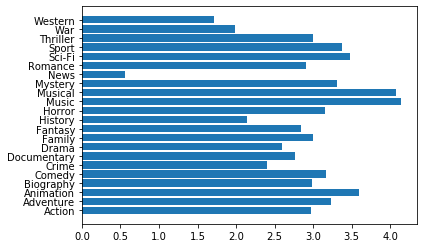

In [7]:
complete_genre_table.groupby("genre").mean().sort_values("success_score", ascending=False)
#plt.barh(complete_genre_table.groupby("genre").mean().index, complete_genre_table.groupby("genre").mean().success_score)
plt.barh(complete_genre_table.groupby("genre").mean().index, complete_genre_table.groupby("genre").mean().worldwide_gross/complete_genre_table.groupby("genre").mean().production_budget)

<BarContainer object of 22 artists>

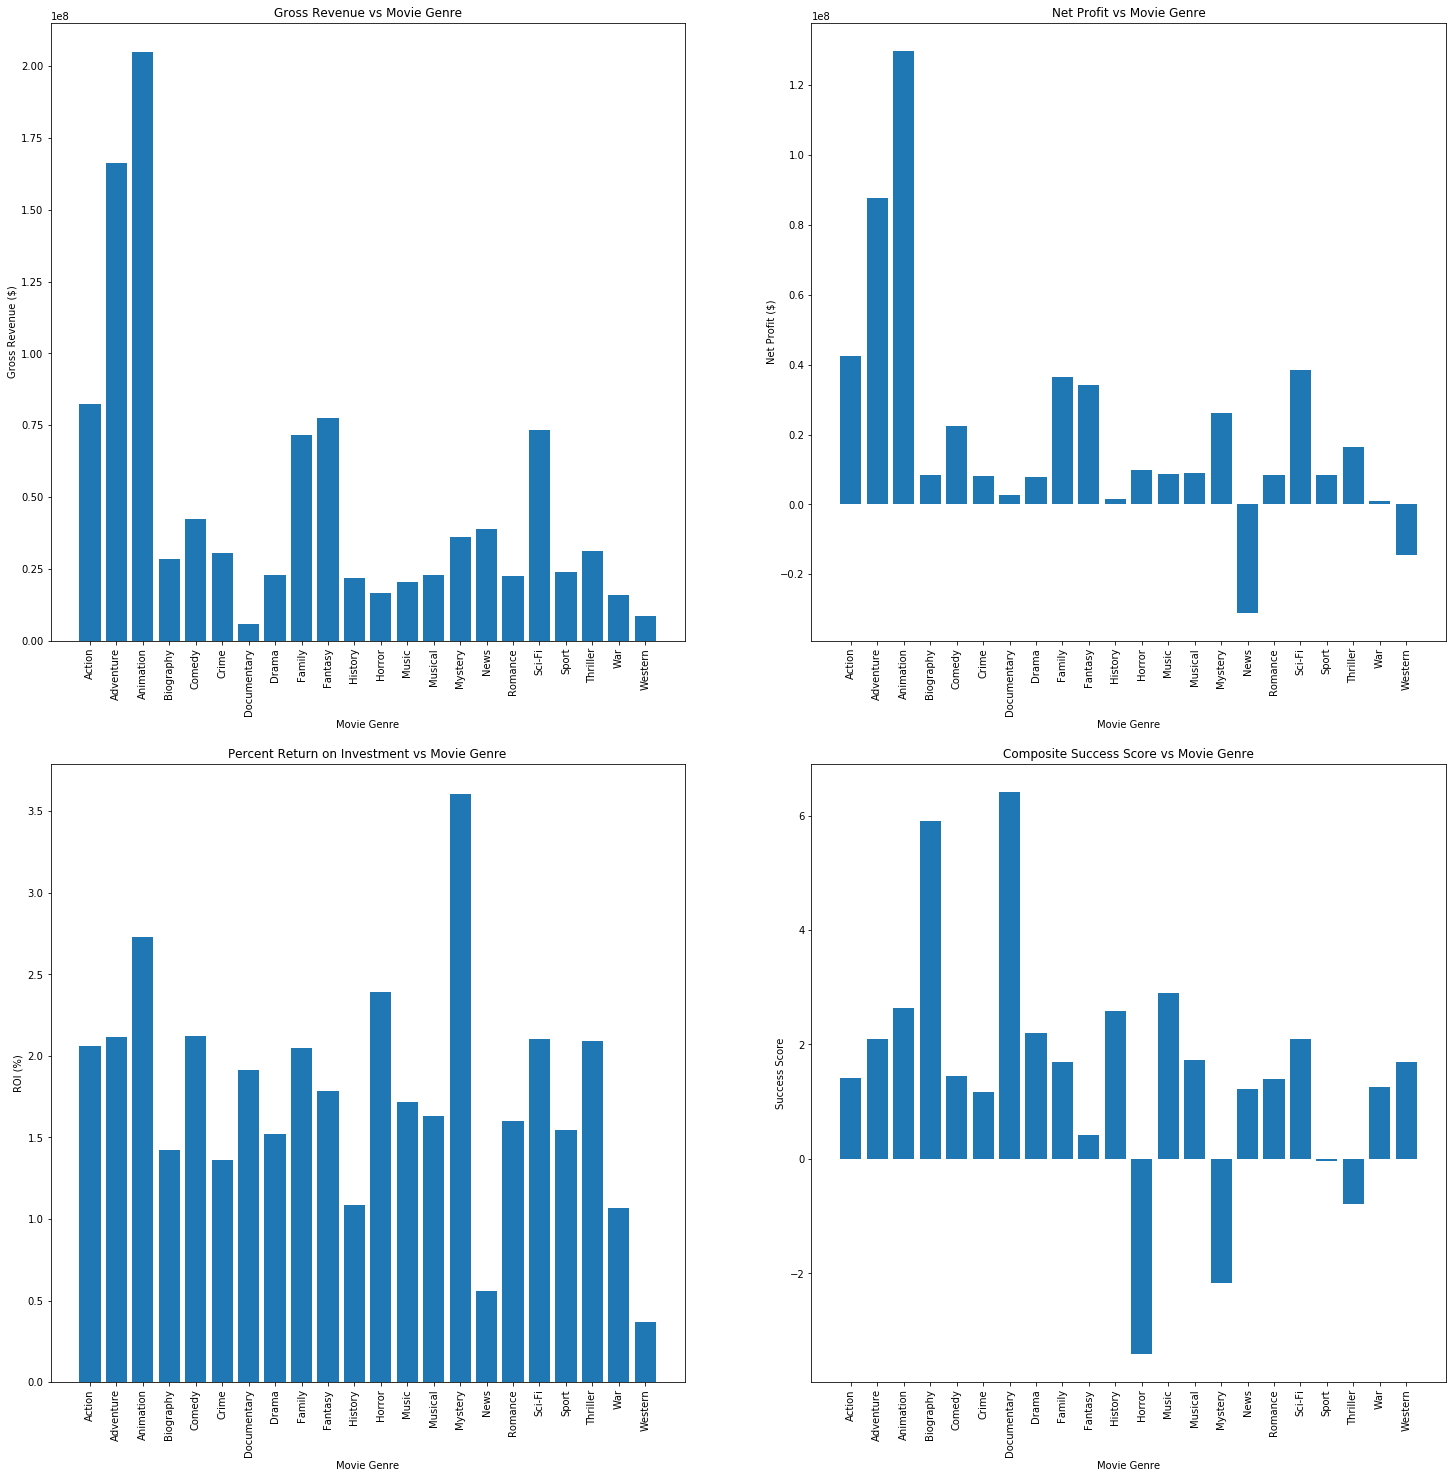

In [8]:
#GENRE Graphs

figure, ax = plt.subplots(2, 2, figsize=(25, 25))

x=complete_genre_table.groupby("genre").median().index
y0_gross_rev= complete_genre_table.groupby("genre").median().worldwide_gross
y1_net_prof= complete_genre_table.groupby("genre").median().worldwide_gross-complete_genre_table.groupby("genre").median().production_budget
y2_roi_percent= complete_genre_table.groupby("genre").median().worldwide_gross/complete_genre_table.groupby("genre").median().production_budget
y3_comp= complete_genre_table.groupby("genre").mean().success_score 

ax[0][0].set_title('Gross Revenue vs Movie Genre')
ax[0][0].set_xlabel('Movie Genre')
ax[0][0].set_ylabel('Gross Revenue ($)')

ax[0][1].set_title('Net Profit vs Movie Genre')
ax[0][1].set_xlabel('Movie Genre')
ax[0][1].set_ylabel('Net Profit ($)')

ax[1][0].set_title('Percent Return on Investment vs Movie Genre')
ax[1][0].set_xlabel('Movie Genre')
ax[1][0].set_ylabel('ROI (%)')

ax[1][1].set_title('Composite Success Score vs Movie Genre')
ax[1][1].set_xlabel('Movie Genre')
ax[1][1].set_ylabel('Success Score')

ax[0][0].set_xticklabels(x,rotation=90)
ax[0][1].set_xticklabels(x,rotation=90)
ax[1][0].set_xticklabels(x,rotation=90)
ax[1][1].set_xticklabels(x,rotation=90)

ax[0][0].bar(x, y0_gross_rev)
ax[0][1].bar(x, y1_net_prof)
ax[1][0].bar(x, y2_roi_percent)
ax[1][1].bar(x, y3_comp)




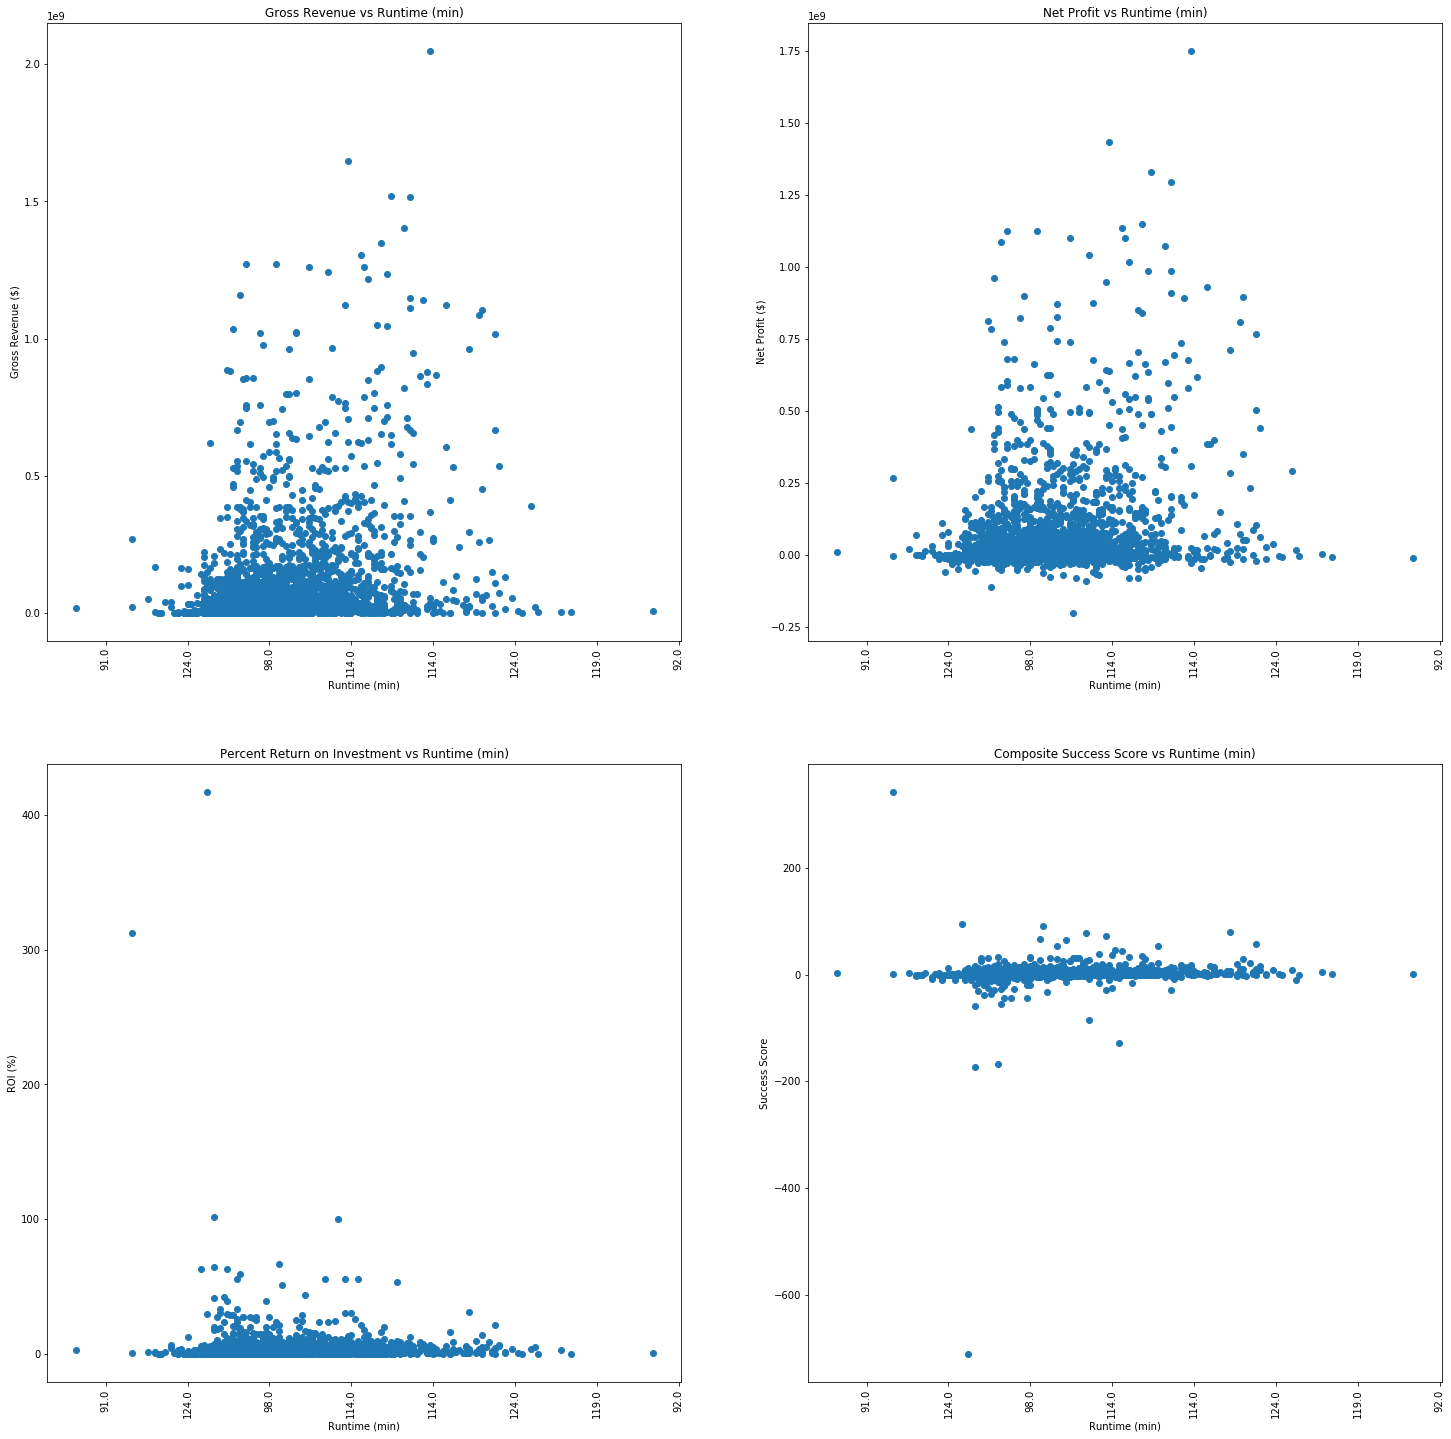

In [9]:
#RUNTIME Graphs

figure, ax = plt.subplots(2, 2, figsize=(25, 25))

x=master_table.runtime_minutes
y0_gross_rev= master_table.worldwide_gross
y1_net_prof= master_table.worldwide_gross-master_table.production_budget
y2_roi_percent= master_table.worldwide_gross/master_table.production_budget
y3_comp= master_table.success_score 

ax[0][0].set_title('Gross Revenue vs Runtime (min)')
ax[0][0].set_xlabel('Runtime (min)')
ax[0][0].set_ylabel('Gross Revenue ($)')

ax[0][1].set_title('Net Profit vs Runtime (min)')
ax[0][1].set_xlabel('Runtime (min)')
ax[0][1].set_ylabel('Net Profit ($)')

ax[1][0].set_title('Percent Return on Investment vs Runtime (min)')
ax[1][0].set_xlabel('Runtime (min)')
ax[1][0].set_ylabel('ROI (%)')

ax[1][1].set_title('Composite Success Score vs Runtime (min)')
ax[1][1].set_xlabel('Runtime (min)')
ax[1][1].set_ylabel('Success Score')

ax[0][0].set_xticklabels(x,rotation=90)
ax[0][1].set_xticklabels(x,rotation=90)
ax[1][0].set_xticklabels(x,rotation=90)
ax[1][1].set_xticklabels(x,rotation=90)

ax[0][0].scatter(x, y0_gross_rev)
ax[0][1].scatter(x, y1_net_prof)
ax[1][0].scatter(x, y2_roi_percent)
ax[1][1].scatter(x, y3_comp)




In [10]:
correlations=[y0_gross_rev.corr(x),
y1_net_prof.corr(x),
y2_roi_percent.corr(x),
y3_comp.corr(x)]
correlations

[0.2654695477399918,
 0.23492114201798958,
 -0.03165178853132957,
 0.08998928519354883]

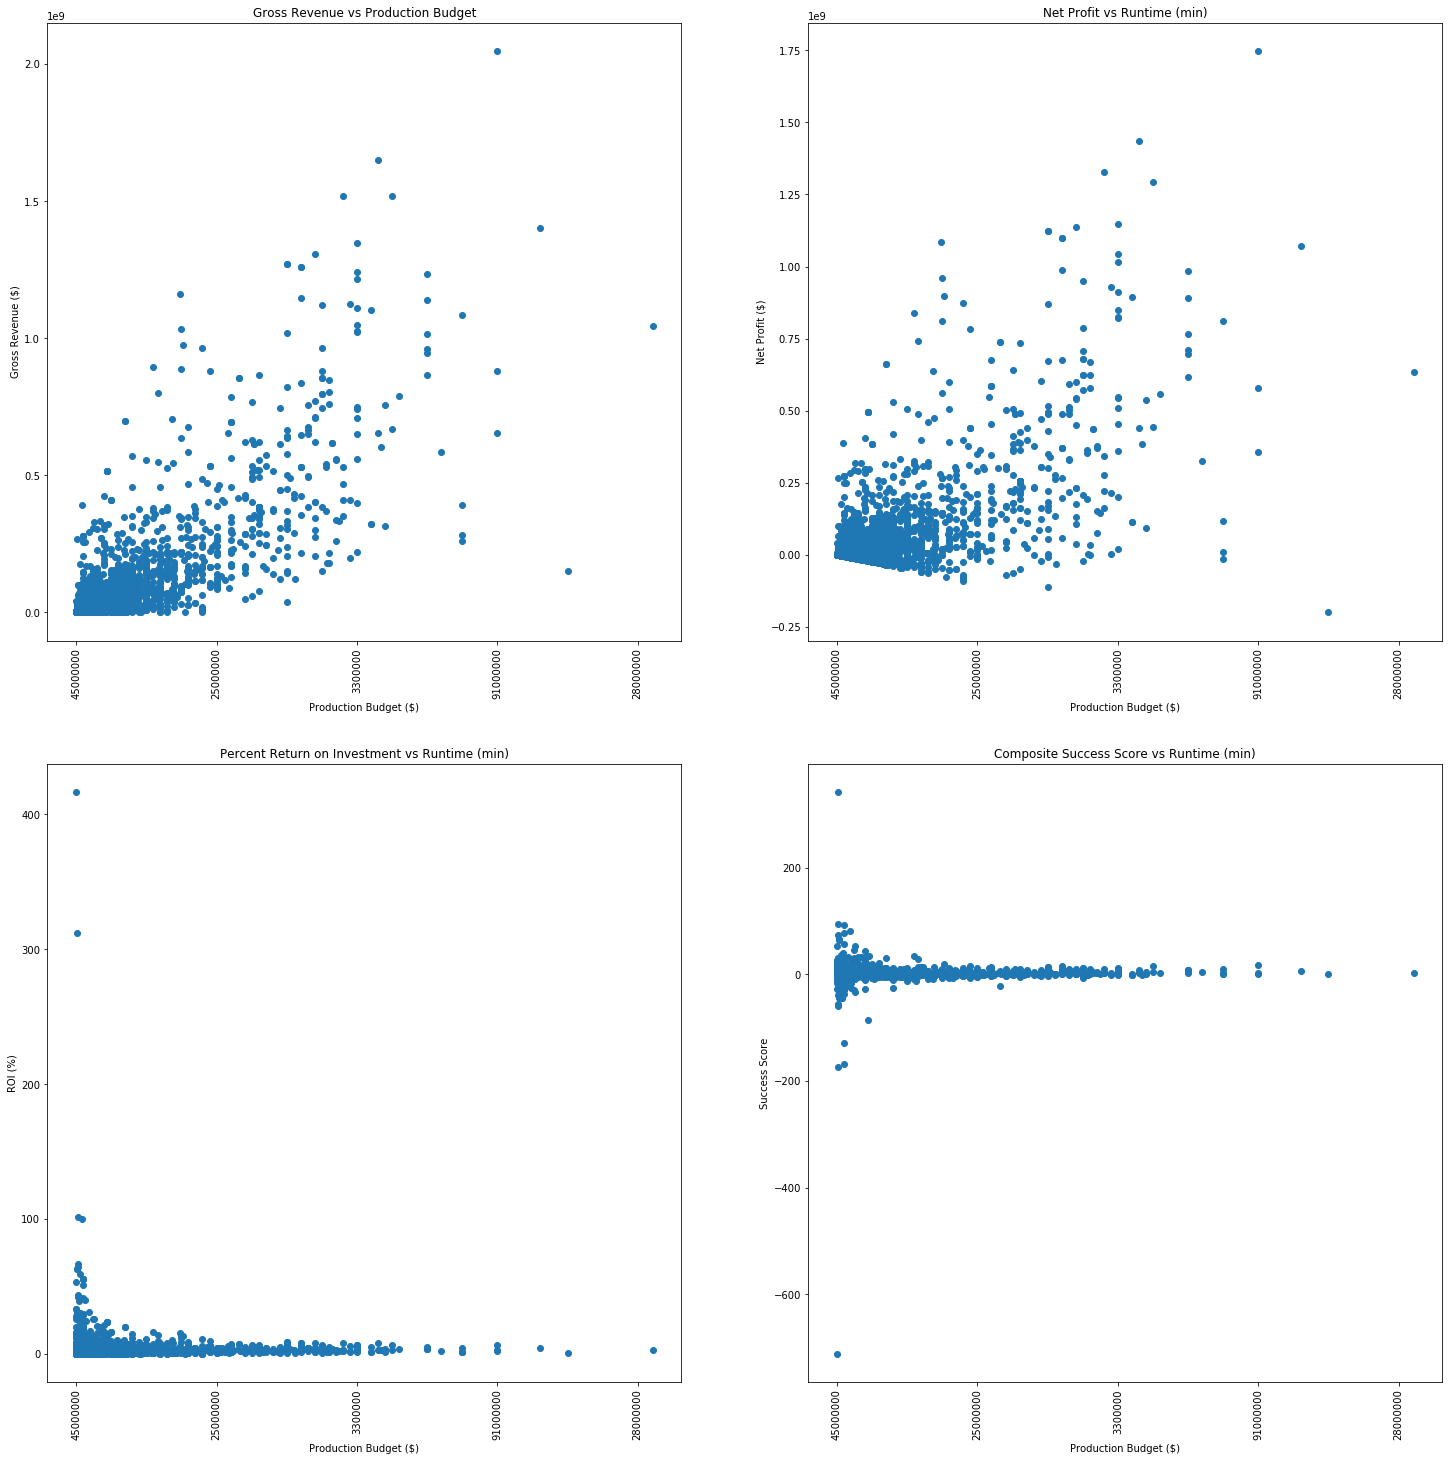

In [11]:
#BUDGET Graphs

figure, ax = plt.subplots(2, 2, figsize=(25, 25))

x=master_table.production_budget
y0_gross_rev= master_table.worldwide_gross
y1_net_prof= master_table.worldwide_gross-master_table.production_budget
y2_roi_percent= master_table.worldwide_gross/master_table.production_budget
y3_comp= master_table.success_score 

ax[0][0].set_title('Gross Revenue vs Production Budget')
ax[0][0].set_xlabel('Production Budget ($)')
ax[0][0].set_ylabel('Gross Revenue ($)')

ax[0][1].set_title('Net Profit vs Runtime (min)')
ax[0][1].set_xlabel('Production Budget ($)')
ax[0][1].set_ylabel('Net Profit ($)')

ax[1][0].set_title('Percent Return on Investment vs Runtime (min)')
ax[1][0].set_xlabel('Production Budget ($)')
ax[1][0].set_ylabel('ROI (%)')

ax[1][1].set_title('Composite Success Score vs Runtime (min)')
ax[1][1].set_xlabel('Production Budget ($)')
ax[1][1].set_ylabel('Success Score')

ax[0][0].set_xticklabels(x,rotation=90)
ax[0][1].set_xticklabels(x,rotation=90)
ax[1][0].set_xticklabels(x,rotation=90)
ax[1][1].set_xticklabels(x,rotation=90)

ax[0][0].scatter(x, y0_gross_rev)
ax[0][1].scatter(x, y1_net_prof)
ax[1][0].scatter(x, y2_roi_percent)
ax[1][1].scatter(x, y3_comp)




In [12]:
correlations=[y0_gross_rev.corr(x),
y1_net_prof.corr(x),
y2_roi_percent.corr(x),
y3_comp.corr(x)]
correlations

[0.7793181976488253,
 0.6501232119805542,
 -0.03665645673565657,
 0.03569281742304267]

In [18]:
data["reviews"]

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [14]:
import requests
import sys
import numpy as np
import time
from bs4 import BeautifulSoup

In [209]:
tconst_list=list(master_table.tconst)
tconst_test=tconst_list[0:100]
#id="tt6699860"

ratings_list=[]
short_list=["tt1636833"]


for tconst in tconst_list:
    id=tconst
    page = requests.get("https://www.imdb.com/title/" + id + "/")
    soup = BeautifulSoup(page.content, 'html.parser')
    ratings=soup.find(id="titleStoryLine")
    try:
        rate=ratings.find_all(class_="txt-block")[1].text.strip()
        #ratings_list.append(rate.split("\n")[1])
        ratings_list.append(rate.split("\n"))
        time.sleep(.01)
    except:
        rate=ratings.find_all(class_="txt-block")[0].text.strip()
        #ratings_list.append(rate.split("\n")[1])
        ratings_list.append(rate.split("\n"))
        time.sleep(.01)
    
ratings_list

[['Parents Guide:', '', ' Add content advisory for parents\xa0»'],
 ['Motion Picture Rating',
  '                    (MPAA)',
  '                ',
  'Rated PG for rude and suggestive content, innuendo and language',
  '| ',
  ' See all certifications\xa0»'],
 ['Motion Picture Rating',
  '                    (MPAA)',
  '                ',
  'Rated R for strong sexual content, drug use and language',
  '| ',
  ' See all certifications\xa0»'],
 ['Certificate:', 'Not Rated', '| ', ' See all certifications\xa0»'],
 ['Motion Picture Rating',
  '                    (MPAA)',
  '                ',
  'Rated PG for some crude comments, language and action violence',
  '| ',
  ' See all certifications\xa0»'],
 ['Motion Picture Rating',
  '                    (MPAA)',
  '                ',
  'Rated R for strong violence, disturbing images, language and brief nudity',
  '| ',
  ' See all certifications\xa0»'],
 ['Motion Picture Rating',
  '                    (MPAA)',
  '                ',
  'Rated

In [210]:
len(ratings_list)
#collected_ratings.append(ratings_list)

2521

In [212]:
#collected_ratings[0]=ratings_list

In [213]:
#collected_ratings
#len(tconst_list)
#tconst_list[-1]
#tconst_test[-1]

In [214]:
#collected_ratings[25]

In [211]:
#tconst_test=tconst_list[:5]
#tconst_test

In [215]:
#collected_ratings

In [217]:
# crd=ratings_list
# crd


In [218]:
# lenlist=[]
# for part in list(range(0, len(crd))):
#     lenlist.append(len(crd[part]))
# lenlist

In [219]:

#crd_collect=crd[0]
#for ind in list(range(1, len(crd))):
#    crd_collect+=crd[ind]
#len(crd_collect)
crd_collect=ratings_list

In [220]:
crdm_collect=[]
for movie in crd_collect:
    crdm_collect+=movie

len(crdm_collect)
# lengths=map(lambda x: len(x), crd_collect)
# lengths_list=list(lengths)
# lengths_list
# sum(lengths_list)
#len(lengths_list)
# len(crd_collect)

12227

In [221]:
crdm_collect

['Parents Guide:',
 '',
 ' Add content advisory for parents\xa0»',
 'Motion Picture Rating',
 '                    (MPAA)',
 '                ',
 'Rated PG for rude and suggestive content, innuendo and language',
 '| ',
 ' See all certifications\xa0»',
 'Motion Picture Rating',
 '                    (MPAA)',
 '                ',
 'Rated R for strong sexual content, drug use and language',
 '| ',
 ' See all certifications\xa0»',
 'Certificate:',
 'Not Rated',
 '| ',
 ' See all certifications\xa0»',
 'Motion Picture Rating',
 '                    (MPAA)',
 '                ',
 'Rated PG for some crude comments, language and action violence',
 '| ',
 ' See all certifications\xa0»',
 'Motion Picture Rating',
 '                    (MPAA)',
 '                ',
 'Rated R for strong violence, disturbing images, language and brief nudity',
 '| ',
 ' See all certifications\xa0»',
 'Motion Picture Rating',
 '                    (MPAA)',
 '                ',
 'Rated PG-13 for intense sequences of

In [222]:
crdm_set=set(crdm_collect)
len(crdm_set)
crdmsl= list(crdm_set)

newlist=[]
for a in crdmsl:
    if "Rated" not in a:
        newlist.append(a)
newlist

['',
 'rated PG for thematic elements and some peril',
 ' Add content advisory for parents\xa0»',
 'Certificate:',
 'TV-14',
 ' See all certifications\xa0»',
 'rated PG-13 for some suggestive content and language',
 'RatPG-13 for some language and suggestive comments',
 'rated R for strong violence, language and sexuality',
 '                    (MPAA)',
 'PG',
 'G',
 'Motion Picture Rating',
 'PG-13',
 'rated R for war violence and language throughout',
 'Unrated',
 'R for crude sexual content, language throughout, drug use and brief bloody images',
 'TV-MA',
 'TV-Y7',
 'Parents Guide:',
 'R',
 '                ',
 'TV-PG',
 '| ',
 'rated PG-13 for sequences of sci-fi violence and action, and some language',
 ' View content advisory\xa0»']

In [231]:
import copy

mirror_crdc=crd_collect
mindex=list(range(0, len(crd_collect)))
mirror_crdc2=copy.deepcopy(mirror_crdc)


for mi in mindex:
    cindex=list(range(0, len(mirror_crdc[mi])))
    for ci in cindex:
        if "ated R " in mirror_crdc[mi][ci]:
            mirror_crdc2[mi][ci]="R"
        elif "R for " in mirror_crdc[mi][ci]:
            mirror_crdc2[mi][ci]="R"
        elif "13 for" in mirror_crdc[mi][ci]:
            mirror_crdc2[mi][ci]="PG-13"
        elif "PG for" in mirror_crdc[mi][ci]:
            mirror_crdc2[mi][ci]="PG"
        elif "Y7" in mirror_crdc[mi][ci]:
            mirror_crdc2[mi][ci]="G"
        elif "TV-MA" in mirror_crdc[mi][ci]:
            mirror_crdc2[mi][ci]="R"
        elif "TV-14" in mirror_crdc[mi][ci]:
            mirror_crdc2[mi][ci]="PG-13"
        elif "TV-PG" in mirror_crdc[mi][ci]:
            mirror_crdc2[mi][ci]="PG"
        elif "13 on" in mirror_crdc[mi][ci]:
            mirror_crdc2[mi][ci]="PG-13"
        elif "-13  " in mirror_crdc[mi][ci]:
            mirror_crdc2[mi][ci]="PG-13"
        elif "Unrated" in mirror_crdc[mi][ci]:
            mirror_crdc2[mi][ci]="Not Rated"
            
mirror_crdc2            

            

[['Parents Guide:', '', ' Add content advisory for parents\xa0»'],
 ['Motion Picture Rating',
  '                    (MPAA)',
  '                ',
  'PG',
  '| ',
  ' See all certifications\xa0»'],
 ['Motion Picture Rating',
  '                    (MPAA)',
  '                ',
  'R',
  '| ',
  ' See all certifications\xa0»'],
 ['Certificate:', 'Not Rated', '| ', ' See all certifications\xa0»'],
 ['Motion Picture Rating',
  '                    (MPAA)',
  '                ',
  'PG',
  '| ',
  ' See all certifications\xa0»'],
 ['Motion Picture Rating',
  '                    (MPAA)',
  '                ',
  'R',
  '| ',
  ' See all certifications\xa0»'],
 ['Motion Picture Rating',
  '                    (MPAA)',
  '                ',
  'PG-13',
  '| ',
  ' See all certifications\xa0»'],
 ['Motion Picture Rating',
  '                    (MPAA)',
  '                ',
  'R',
  '| ',
  ' See all certifications\xa0»'],
 ['Motion Picture Rating',
  '                    (MPAA)',
  '         

In [232]:
allcomments=[]
for movie in mirror_crdc2:
    allcomments+=movie
len(allcomments)
set(allcomments)

{'',
 '                ',
 '                    (MPAA)',
 ' Add content advisory for parents\xa0»',
 ' See all certifications\xa0»',
 ' View content advisory\xa0»',
 'Certificate:',
 'G',
 'Motion Picture Rating',
 'Not Rated',
 'PG',
 'PG-13',
 'Parents Guide:',
 'R',
 '| '}

In [253]:
rate_list=[]

def empty_check(movies):
    rate_list=[]
    for movie in movies:
        rating=""
        for comment in movie:
            if comment=="R" or comment=="PG-13" or comment=="PG" or comment=="G" or comment=="Not Rated":
                rating=comment
        if rating=="":
            rating="Not Rated"
        rate_list.append(rating)    
    return rate_list

full_rating_list=empty_check(mirror_crdc2)
rating_table=pd.DataFrame({"tconst":tconst_list, "mpaa_rating":full_rating_list})

complete_rating_table=pd.merge(rating_table, master_table, how="left", on="tconst")
complete_rating_table
complete_rating_table.groupby("mpaa_rating").median()


,start_year,runtime_minutes,averagerating,numvotes,mean_diff,id,production_budget,worldwide_gross,success_score
mpaa_rating,,,,,,,,,
G,2011.0,102.0,6.6,39149.0,0.692985,49.0,56000000.0,250091610.0,1.238880
Not Rated,2014.0,98.0,6.1,829.5,0.192985,50.0,10000000.0,8966525.0,0.001816
PG,2014.0,98.0,6.4,38731.0,0.492985,47.0,55000000.0,122737201.0,0.975932
PG-13,2014.0,109.0,6.4,77234.0,0.492985,53.0,30000000.0,73421224.0,0.666050
R,2014.0,103.0,6.3,48455.0,0.392985,52.0,18000000.0,29583391.5,0.289845


<BarContainer object of 5 artists>

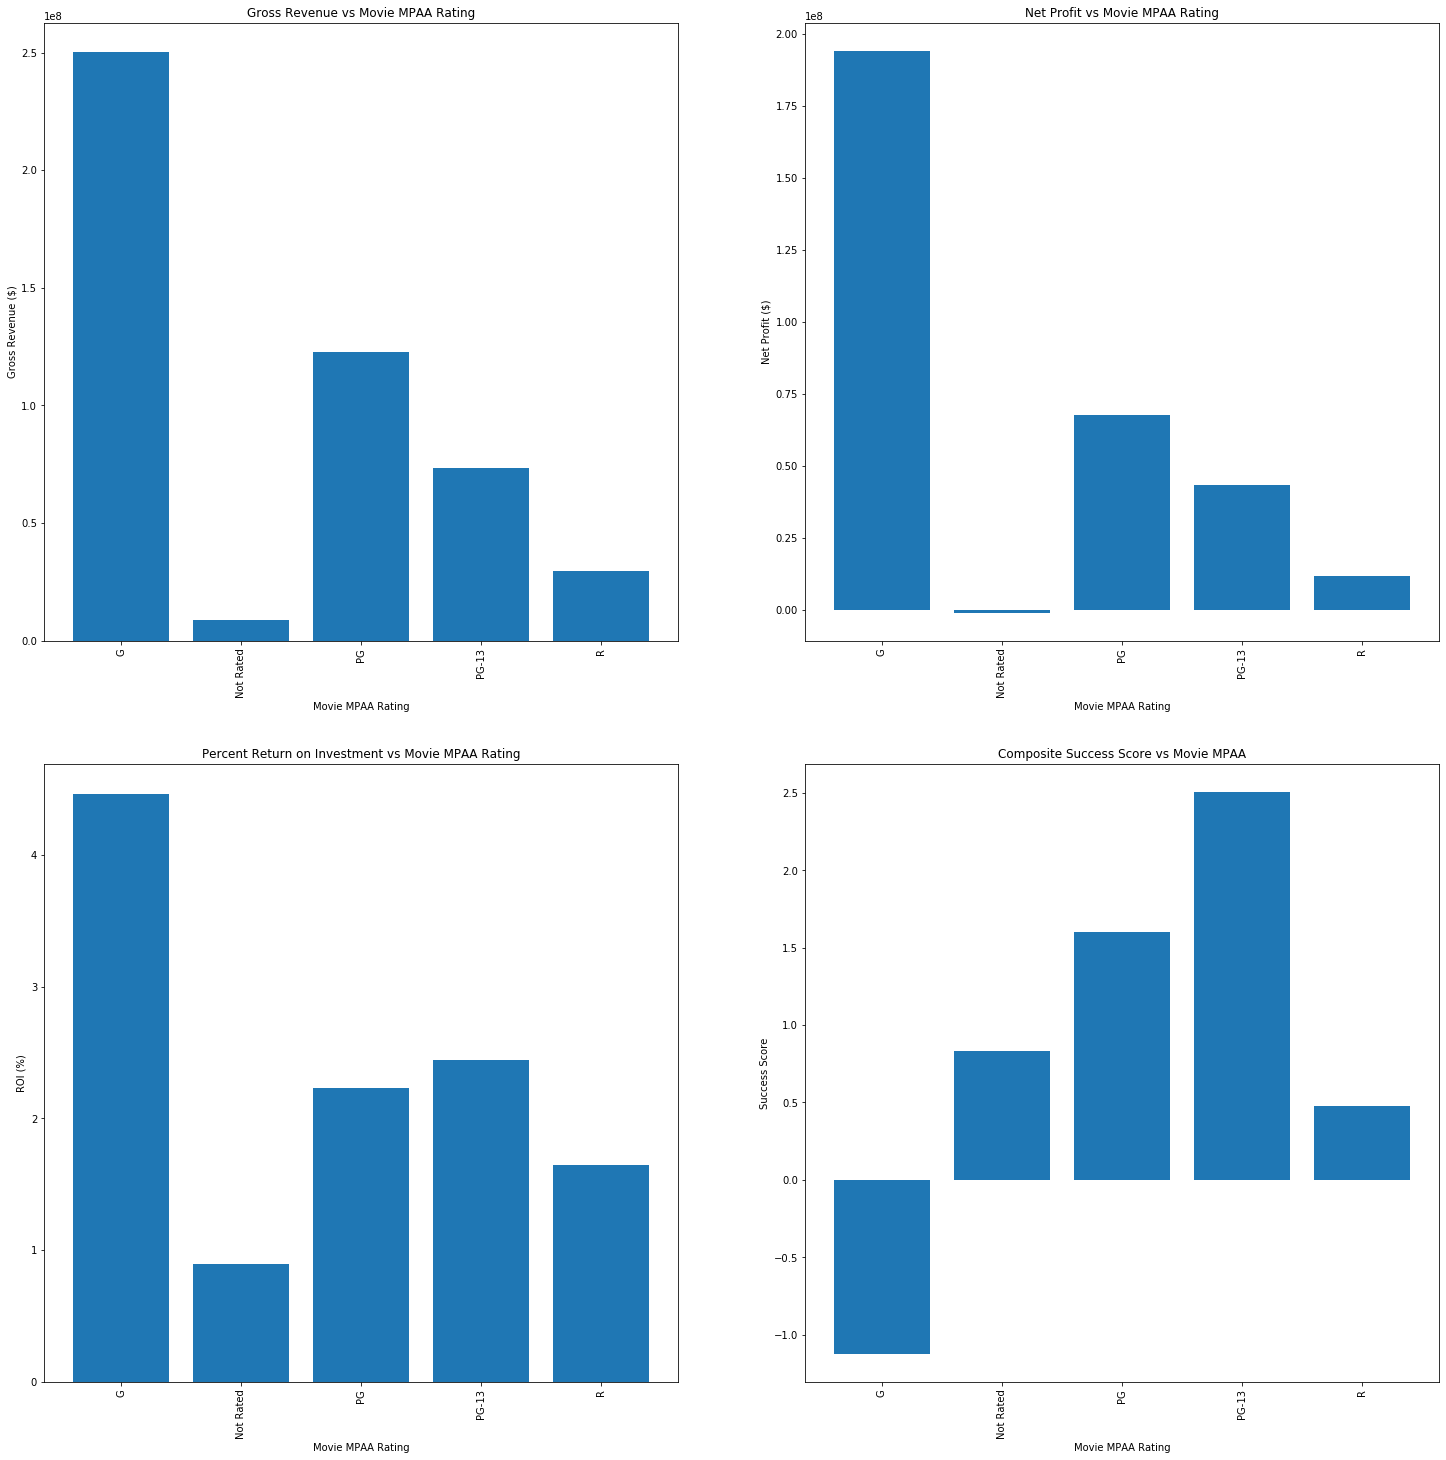

In [254]:
#RATING Graphs

figure, ax = plt.subplots(2, 2, figsize=(25, 25))

x=complete_rating_table.groupby("mpaa_rating").median().index
y0_gross_rev= complete_rating_table.groupby("mpaa_rating").median().worldwide_gross
y1_net_prof= complete_rating_table.groupby("mpaa_rating").median().worldwide_gross-complete_rating_table.groupby("mpaa_rating").median().production_budget
y2_roi_percent= complete_rating_table.groupby("mpaa_rating").median().worldwide_gross/complete_rating_table.groupby("mpaa_rating").median().production_budget
y3_comp= complete_rating_table.groupby("mpaa_rating").mean().success_score 

ax[0][0].set_title('Gross Revenue vs Movie MPAA Rating')
ax[0][0].set_xlabel('Movie MPAA Rating')
ax[0][0].set_ylabel('Gross Revenue ($)')

ax[0][1].set_title('Net Profit vs Movie MPAA Rating')
ax[0][1].set_xlabel('Movie MPAA Rating')
ax[0][1].set_ylabel('Net Profit ($)')

ax[1][0].set_title('Percent Return on Investment vs Movie MPAA Rating')
ax[1][0].set_xlabel('Movie MPAA Rating')
ax[1][0].set_ylabel('ROI (%)')

ax[1][1].set_title('Composite Success Score vs Movie MPAA')
ax[1][1].set_xlabel('Movie MPAA Rating')
ax[1][1].set_ylabel('Success Score')

ax[0][0].set_xticklabels(x,rotation=90)
ax[0][1].set_xticklabels(x,rotation=90)
ax[1][0].set_xticklabels(x,rotation=90)
ax[1][1].set_xticklabels(x,rotation=90)

ax[0][0].bar(x, y0_gross_rev)
ax[0][1].bar(x, y1_net_prof)
ax[1][0].bar(x, y2_roi_percent)
ax[1][1].bar(x, y3_comp)




# Process

**Main Objective:**
Microsoft will be starting its own film production studio/content service and desires to begin making films that are *successful*. What type of films should Microsoft make to guarantee the service's success?

**First step in solving the problem is answering the question** "***How do we define success? What are the indicators of a successful movie?***"

## Two important assumptions:
- Microsoft is a business trying to make money. Therefore, a successful service should maximize profits.
- Users are more likely to stay subscribed to a service if:
    1. Quality of content is good 
    2. High amount of content

In light of the above, four success indicators were chosen to rate movies against:

    1. Gross Revenue
    2. Net Profit
    3. Percent Return on Investment
    4. Quality-weighted Percent Return on Investment

**With success indicators established, the next step in solving our problem is finding movie traits that maximize success**

To do so, we comb historical film data, decompose each film into a list of traits, and then measure those traits against success indicators. The following traits were measured:

    1. Genre
    2. Movie Length
    3. Production Budget
    4. Target Age Group
    5. Director
    6. Release Date
    7. Soundtrack Composer
    

In [257]:
master_table

,tconst,title_x,original_title,start_year,runtime_minutes,genres,title_y,averagerating,numvotes,mean_diff,id,production_budget,worldwide_gross,success_score
0,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",Saving Grace,8.1,263,2.192985,95,4000000,27786849,15.234036
1,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",Foodfight!,1.9,8248,-4.007015,26,45000000,73706,-0.006563
2,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",On the Road,6.1,37886,0.192985,17,25000000,9313302,0.071893
3,tt0339736,The Evil Within,The Evil Within,2017,98.0,Horror,Whiplash,5.6,2420,-0.307015,43,3300000,38969037,-3.625478
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",The Secret Life of Walter Mitty,7.3,275300,1.392985,37,91000000,187861183,2.875690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,tt8941440,Virus,Virus,2019,152.0,"Drama,Thriller",Virus,8.6,372,2.692985,69,75000000,30626690,1.099696
2517,tt9024106,Unplanned,Unplanned,2019,106.0,"Biography,Drama",Unplanned,6.3,5945,0.392985,33,6000000,18107621,1.186004
2518,tt9174334,The Villagers,The Villagers,2018,99.0,"Action,Thriller",Ordinary People,5.7,101,-0.207015,18,6000000,52302978,-1.804583
2519,tt9225192,Unstoppable,Seongnan hwangso,2018,116.0,"Action,Crime",Unstoppable,6.5,576,0.592985,19,95000000,165720921,1.034421


/Users/benspilsbury/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/distributions.py:437: UserWarning: The following kwargs were not used by contour: 'fill', 'thresh'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


AttributeError: module 'seaborn' has no attribute 'histplot'

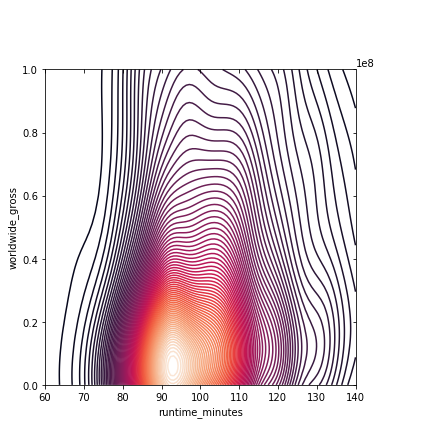

In [262]:
import seaborn as sns
#sns.set_theme(style="white")



g = sns.JointGrid(data=master_table, x="runtime_minutes", y="worldwide_gross", space=0)
g.plot_joint(sns.kdeplot,
             fill=True, clip=((60, 140), (0, 100000000)),
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)